In [9]:
from math import sqrt, exp, log
from datetime import timedelta as _timedelta, datetime as _datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os.path import join as j
import os
from carbon.helpers.pdread import *
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [8,4]

# Create Path Charts and Display

In [10]:
fn = "RAN-050-00.pickle"
fn0 = fn.split(".")[0]

In [11]:
!ls *.pickle

COS.pickle        RAN-010-00.pickle RAN-050-00.pickle RAN-100-00.pickle
RAN-005-00.pickle RAN-020-00.pickle RAN-075-00.pickle RAN-SIGMU.pickle


## Setup

In [12]:
OUTPATH = "charts"
OUTPATH = None
if OUTPATH:
    pass
    !rm {OUTPATH}/*.png

In [13]:
!ls charts

RANPTH-02000-0000.pdf RANPTH-05000-0000.pdf RANPTH-07500-0000.pdf


## Plot data

In [14]:
cols = pdcols(fn)

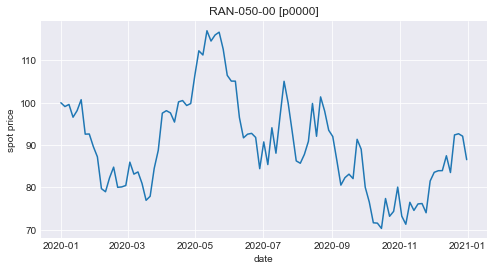

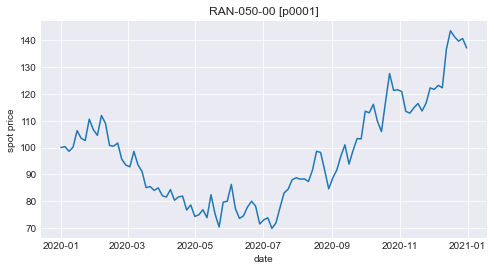

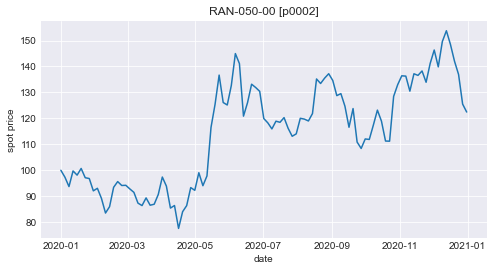

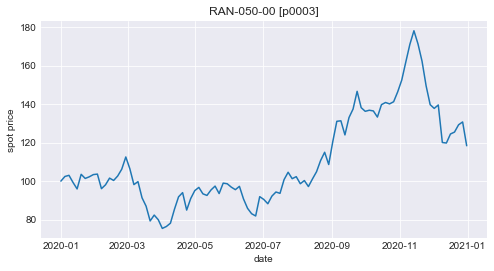

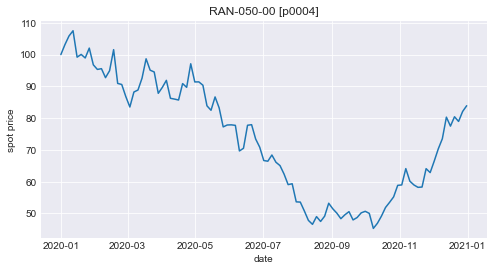

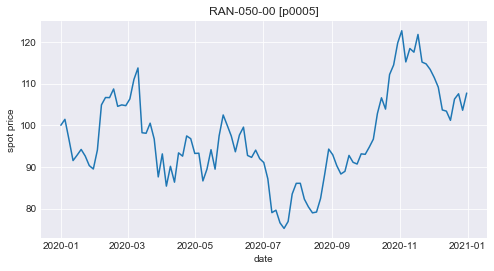

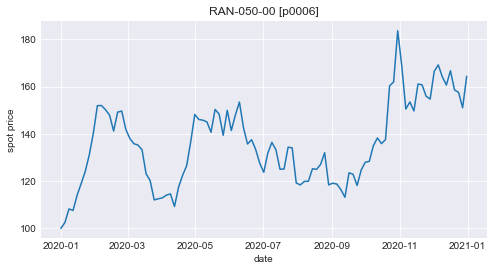

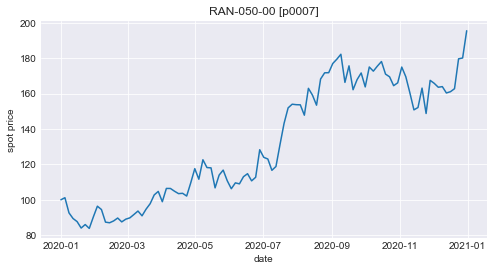

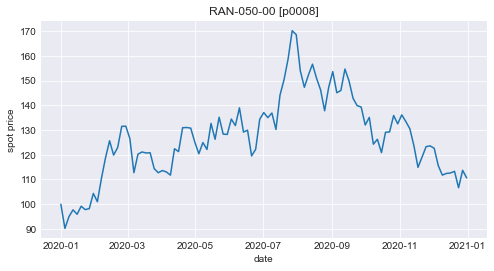

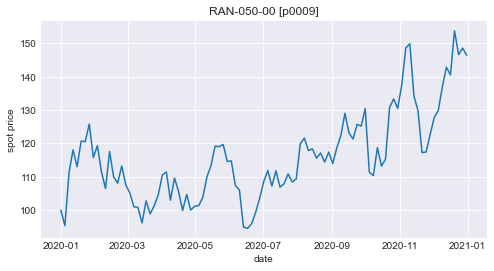

In [15]:
for col in cols[:100] if OUTPATH else cols[:10]:
    ser = pdread(fn, col)
    plt.title(f"{fn0} [{col}]")
    plt.plot(ser)
    plt.xlabel("date")
    plt.ylabel("spot price")
    plt.grid()
    if OUTPATH:
        savefn = f"{fn0}-{col}.png"
        print(f"saving as {savefn}")
        plt.savefig(j(OUTPATH, savefn))
    plt.show()

In [16]:
if OUTPATH:
    !ls {OUTPATH}/*.png

In [17]:
if OUTPATH:
    from fls import fsave
    filelist = os.listdir(OUTPATH)
    filelist = [fn for fn in filelist if fn[-4:]==".png"]
    markdown = "\n\n".join(f"![]({OUTPATH}/{fn})" for fn in filelist)
    fsave(markdown, "_charts.md", OUTPATH)
    !pandoc {OUTPATH}/_charts.md -o {OUTPATH}/_charts.docx